<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Задание 1. Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.

In [ ]:
marketing_campaign = pd.read_csv('/content/drive/MyDrive/Самостоятельная работа 5/marketing_campaign.csv')
marketing_campaign.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [ ]:
users = pd.read_csv('/content/drive/MyDrive/Самостоятельная работа 5/subscribers.csv')
users.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [ ]:
subscribers = pd.read_csv('/content/drive/MyDrive/Самостоятельная работа 5/users.csv')
subscribers.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [ ]:
print("Количество строк в marketing_campaign.csv:", marketing_campaign.shape[0])
print("Количество строк в users.csv:", users.shape[0])
print("Количество строк в subscribers.csv:", subscribers.shape[0])

Количество строк в marketing_campaign.csv: 10037
Количество строк в users.csv: 10037
Количество строк в subscribers.csv: 10037


In [64]:
merged_data = pd.concat([marketing_campaign, users, subscribers], axis=0, ignore_index=True)
merged_data.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,NaN,NaN,NaN,NaN,NaN,NaN
1,a1001,1/1/18,House Ads,personalization,English,True,NaN,NaN,NaN,NaN,NaN,NaN
2,a1002,1/1/18,House Ads,personalization,English,True,NaN,NaN,NaN,NaN,NaN,NaN
3,a1003,1/1/18,House Ads,personalization,English,True,NaN,NaN,NaN,NaN,NaN,NaN
4,a1004,1/1/18,House Ads,personalization,English,True,NaN,NaN,NaN,NaN,NaN,NaN


Задание 2. Определить типы и статистики колонок.

In [65]:
print("Количество строк в subscribers.csv:", merged_data.shape[0])

Количество строк в subscribers.csv: 30111


In [ ]:
merged_data.dtypes

user_id                object
date_served            object
marketing_channel      object
variant                object
language_displayed     object
converted              object
subscribing_channel    object
date_subscribed        object
date_canceled          object
is_retained            object
age_group              object
language_preferred     object
dtype: object

In [ ]:
print(merged_data.describe())

       user_id date_served marketing_channel  variant language_displayed  \
count    30111       10021             10022    10037              10037   
unique   10037          31                 5        2                  4   
top      a1000     1/15/18         House Ads  control            English   
freq         3         789              4733     5091               9793   

       converted subscribing_channel date_subscribed date_canceled  \
count      10022                1856            1856           577   
unique         2                   5              31           115   
top        False           Instagram         1/16/18        4/2/18   
freq        8946                 600             163            15   

       is_retained    age_group language_preferred  
count         1856        10037              10037  
unique           2            7                  4  
top           True  19-24 years            English  
freq          1279         1682               9275  


In [ ]:
print(merged_data.describe(include='object'))

       user_id date_served marketing_channel  variant language_displayed  \
count    30111       10021             10022    10037              10037   
unique   10037          31                 5        2                  4   
top      a1000     1/15/18         House Ads  control            English   
freq         3         789              4733     5091               9793   

       converted subscribing_channel date_subscribed date_canceled  \
count      10022                1856            1856           577   
unique         2                   5              31           115   
top        False           Instagram         1/16/18        4/2/18   
freq        8946                 600             163            15   

       is_retained    age_group language_preferred  
count         1856        10037              10037  
unique           2            7                  4  
top           True  19-24 years            English  
freq          1279         1682               9275  


In [ ]:
print(merged_data.isnull().sum())

user_id                    0
date_served            20090
marketing_channel      20089
variant                20074
language_displayed     20074
converted              20089
subscribing_channel    28255
date_subscribed        28255
date_canceled          29534
is_retained            28255
age_group              20074
language_preferred     20074
dtype: int64


Задание 3.Определить эффективность маркетинговых каналов по привлечению платящих игроков.

In [66]:
pay_users = merged_data[merged_data['converted'] == True]
marketing_channel = pay_users.groupby('marketing_channel')['user_id'].count().reset_index()
marketing_channel.columns = ['marketing_channel', 'pay_users_count']
print(marketing_channel)

  marketing_channel  pay_users_count
0             Email              193
1          Facebook              237
2         House Ads              298
3         Instagram              265
4              Push               83


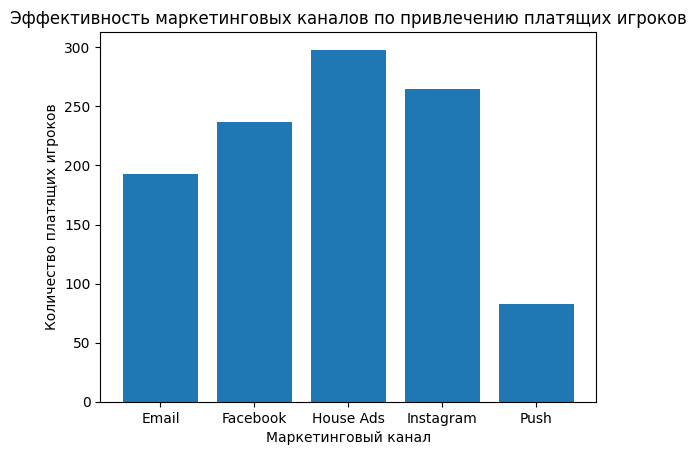

In [ ]:
plt.bar(marketing_channel['marketing_channel'], marketing_channel['pay_users_count'])
plt.xlabel('Маркетинговый канал')
plt.ylabel('Количество платящих игроков')
plt.title('Эффективность маркетинговых каналов по привлечению платящих игроков')
plt.show()

In [67]:
total_users = merged_data.groupby('marketing_channel')['user_id'].count().reset_index()
total_users.columns = ['marketing_channel', 'total_users_count']
marketing_channel = pd.merge(marketing_channel, total_users, on='marketing_channel')
marketing_channel['conversion_rate'] = marketing_channel['pay_users_count'] / marketing_channel['total_users_count']
print(marketing_channel)

  marketing_channel  pay_users_count  total_users_count  conversion_rate
0             Email              193                565         0.341593
1          Facebook              237               1860         0.127419
2         House Ads              298               4733         0.062962
3         Instagram              265               1871         0.141635
4              Push               83                993         0.083585


Задание 4. Определить количество игроков в каждой возрастной группе.

In [68]:
age_group = merged_data.groupby('age_group')['user_id'].nunique().reset_index()
age_group.columns = ['age_group', 'player']
print(age_group)

     age_group  player
0   0-18 years    1539
1  19-24 years    1682
2  24-30 years    1568
3  30-36 years    1355
4  36-45 years    1353
5  45-55 years    1353
6    55+ years    1187


Задание 5. Определить самую раннюю дату подписки на сервис.

In [69]:
earliest_subscription_date = merged_data['date_subscribed'].dropna().min()
print("Самая ранняя дата подписки на сервис:", earliest_subscription_date)

Самая ранняя дата подписки на сервис: 1/1/18


Задание 6. Определить портрет аудитории удержанных подписчиков (по возрасту и языку).

In [ ]:
print("Портрет аудитории удержанных подписчиков по возрасту:", merged_data['age_group'].dropna().unique())
print("Портрет аудитории удержанных подписчиков по языку:", merged_data['language_preferred'].dropna().unique())

Портрет аудитории удержанных подписчиков по возрасту: ['0-18 years' '19-24 years' '24-30 years' '30-36 years' '36-45 years'
 '45-55 years' '55+ years']
Портрет аудитории удержанных подписчиков по языку: ['English' 'German' 'Arabic' 'Spanish']


Задание 7. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [70]:
import scipy.stats as st
CT = pd.crosstab(merged_data['variant'], merged_data['converted'])
success_control = CT.loc['control', True]
success_personalization = CT.loc['personalization', True]
total_control = CT.loc['control', True].sum()
total_personalization = CT.loc['personalization', True].sum()
print(total_control)
print(total_personalization)

st, p_value = st.wilcoxon(total_control, total_personalization)
print(f"Статистика теста: {st}")
print(f"P-значение: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Разница конверсии между вариантами статистически значима.")
else:
    print("Разница конверсии между вариантами не является статистически значимой.")

371
705
Статистика теста: 0.0
P-значение: 1.0
Разница конверсии между вариантами не является статистически значимой.


In [ ]:
# ЧАСТЬ 2

Задание 2. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [58]:
from scipy.optimize import linprog
c = [-45, -80]
A = [[5, 20], [10, 15]]
b = [400, 450]
x_bounds = (0, None)
y_bounds = (0, None)
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
print("Необходимо сделать стульев (x):", round(result.x[0]))
print("Необходимо сделать столов (y):", round(result.x[1]))
print("Максимальная прибыль:", round(-result.fun))

Необходимо сделать стульев (x): 24
Необходимо сделать столов (y): 14
Максимальная прибыль: 2200


Задание 3. Cредний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4 ,day30.6 , day7 0.8 ,day141.10  , day21 1.30 ,day301.40 . Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

Экспоненциальная аппроксимация: a = 0.6004, b = 1.0316
Логарифмическая аппроксимация: a = 0.3042, b = 0.3183
(Экспоненциальная функиця y = ab^x) Прогноз выручки на 90-й день: 9.87$
(Логарифмическая функция y = aln(x) + b)Прогноз выручки на 90-й день : 1.69$
Выбор логарифмической ффункции позволяет нам наблюдать что с течением времени рост/снижение выручки не остаётся постоянной


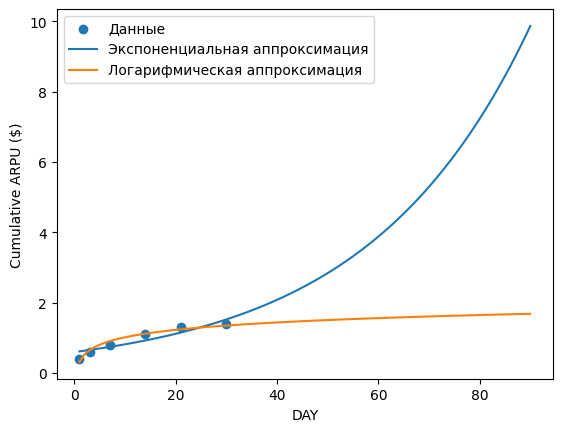

In [72]:
from scipy.optimize import curve_fit
days = np.array([1, 3, 7, 14, 21, 30])
profit = np.array([0.4, 0.6, 0.8, 1.1, 1.3, 1.4])
def exp_func(x, a, b):
    return a * np.power(b, x)
def log_func(x, a, b):
    return a * np.log(x) + b
params_exp, cv_exp = curve_fit(exp_func, days, profit)
params_log, cv_log = curve_fit(log_func, days, profit)
day_90 = 90
profit_exp_90 = exp_func(day_90, *params_exp)
profit_log_90 = log_func(day_90, *params_log)
print("Экспоненциальная аппроксимация: a = {:.4f}, b = {:.4f}".format(*params_exp))
print("Логарифмическая аппроксимация: a = {:.4f}, b = {:.4f}".format(*params_log))
print("(Экспоненциальная функиця y = ab^x) Прогноз выручки на 90-й день: {:.2f}$".format(profit_exp_90))
print("(Логарифмическая функция y = aln(x) + b)Прогноз выручки на 90-й день : {:.2f}$".format(profit_log_90))
print("Выбор логарифмической ффункции позволяет нам наблюдать что с течением времени рост/снижение выручки не остаётся постоянной")
plt.scatter(days, profit, label="Данные")
plt.plot(range(1, day_90+1), exp_func(range(1, day_90+1), *params_exp), label="Экспоненциальная аппроксимация")
plt.plot(range(1, day_90+1), log_func(range(1, day_90+1), *params_log), label="Логарифмическая аппроксимация")
plt.xlabel("DAY")
plt.ylabel("Cumulative ARPU ($)")
plt.legend()
plt.show()